In [ ]:
#Implement K-NN Classifier for classification of any dataset of your choice.
#    a. Load an existing data set
#    b. Split the data set to train and test sets
#    c. Test your model using test set. Find accuracy and confusion Matrix.
#    d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
#    accuracy” and find out the value of k for maximum accuracy for the test samples.

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv("iris.csv")
X = df.drop(columns=['Species'])
y = df['Species']
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (150, 5)
Shape of y: (150,)


In [39]:
print(X.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   1            5.1           3.5            1.4           0.2
1   2            4.9           3.0            1.4           0.2
2   3            4.7           3.2            1.3           0.2
3   4            4.6           3.1            1.5           0.2
4   5            5.0           3.6            1.4           0.2


In [40]:
print("\nFirst few rows of y:")
print(y.head())


First few rows of y:
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (120, 5)
Shape of X_test: (30, 5)
Shape of y_train: (120,)
Shape of y_test: (30,)


In [43]:
print("\nFirst few rows of X_train:")
print(X_train.head())

print("\nFirst few rows of X_test:")
print(X_test.head())

print("\nFirst few rows of y_train:")
print(y_train.head())

print("\nFirst few rows of y_test:")
print(y_test.head())


First few rows of X_train:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
22  23            4.6           3.6            1.0           0.2
15  16            5.7           4.4            1.5           0.4
65  66            6.7           3.1            4.4           1.4
11  12            4.8           3.4            1.6           0.2
42  43            4.4           3.2            1.3           0.2

First few rows of X_test:
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
73    74            6.1           2.8            4.7           1.2
18    19            5.7           3.8            1.7           0.3
118  119            7.7           2.6            6.9           2.3
78    79            6.0           2.9            4.5           1.5
76    77            6.8           2.8            4.8           1.4

First few rows of y_train:
22        Iris-setosa
15        Iris-setosa
65    Iris-versicolor
11        Iris-setosa
42        Iris-setosa
Name: Species, 

In [59]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, X_test, k):
    y_pred = []

    for test_point in X_test:
        distances = [euclidean_distance(test_point, train_point) for train_point in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_indices]

        # Convert labels to numerical values
        label_mapping = {label: i for i, label in enumerate(np.unique(y_train))}
        k_nearest_labels_numeric = [label_mapping[label] for label in k_nearest_labels]

        most_common = np.bincount(k_nearest_labels_numeric).argmax()
        y_pred.append(list(label_mapping.keys())[list(label_mapping.values()).index(most_common)])

    return np.array(y_pred)

# Test the model
k_values = [1, 3, 52, 71, 100]  # Different values of K to test

for k in k_values:
    # Predictions for the test set
    y_pred = predict(X_train.values, y_train.values, X_test.values, k)

    # Calculate accuracy
    acc = accuracy_score(y_test.values, y_pred)
    print(f"\nAccuracy for k={k}: {acc:.4f}")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test.values, y_pred)
    print(f"Confusion Matrix for k={k}:\n{conf_matrix}")



Accuracy for k=1: 1.0000
Confusion Matrix for k=1:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for k=3: 1.0000
Confusion Matrix for k=3:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for k=52: 1.0000
Confusion Matrix for k=52:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for k=71: 1.0000
Confusion Matrix for k=71:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy for k=100: 0.3000
Confusion Matrix for k=100:
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]


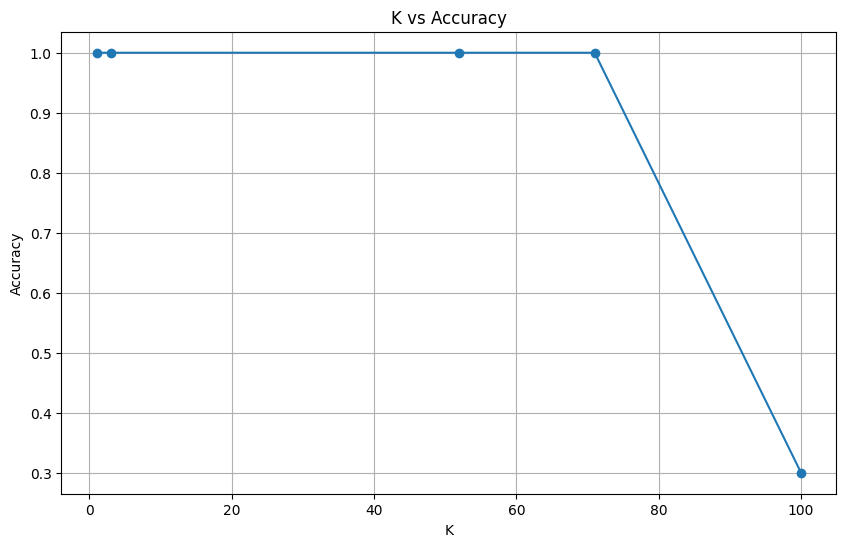


Maximum Accuracy: 1.0000 at k = 1


In [60]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

accuracy_values = []

for k in k_values:
    y_pred = predict(X_train.values, y_train.values, X_test.values, k)
    acc = accuracy_score(y_test.values, y_pred)  # Use accuracy_score from sklearn
    accuracy_values.append(acc)

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()

max_acc_index = np.argmax(accuracy_values)
max_acc_k = k_values[max_acc_index]
print(f"\nMaximum Accuracy: {accuracy_values[max_acc_index]:.4f} at k = {max_acc_k}")
